In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./labeling.csv")

In [3]:
X = data['contents']
y = data['sentiment_label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [6]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)
y_pred_nb = nb_classifier.predict(X_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

Naive Bayes Accuracy: 73.00%


Confusion matrix Naive Bayes:

 [[221  14  27]
 [ 50 152  92]
 [  6  27 211]]


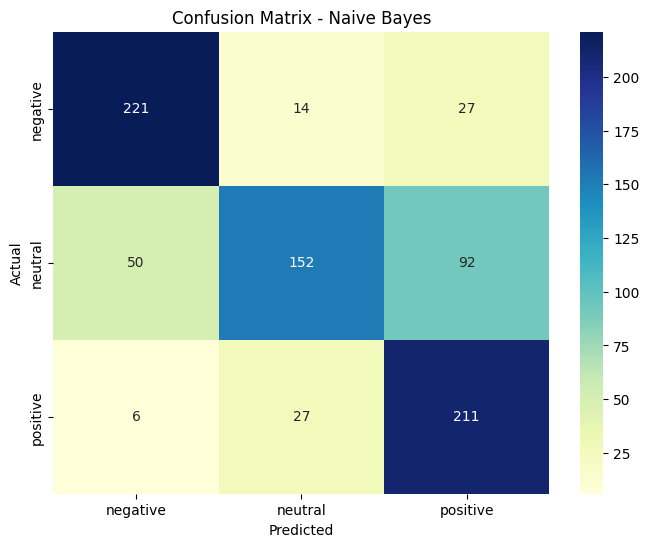

In [7]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
print('Confusion matrix Naive Bayes:\n\n', cm_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [8]:
# Classification report
target_names = ["negative", "neutral", "positive"]
report = classification_report(y_test, y_pred_nb, target_names=target_names, zero_division=1)
print('Classification Report using Naive Bayes:\n\n', report)

Classification Report using Naive Bayes:

               precision    recall  f1-score   support

    negative       0.80      0.84      0.82       262
     neutral       0.79      0.52      0.62       294
    positive       0.64      0.86      0.74       244

    accuracy                           0.73       800
   macro avg       0.74      0.74      0.73       800
weighted avg       0.75      0.73      0.72       800



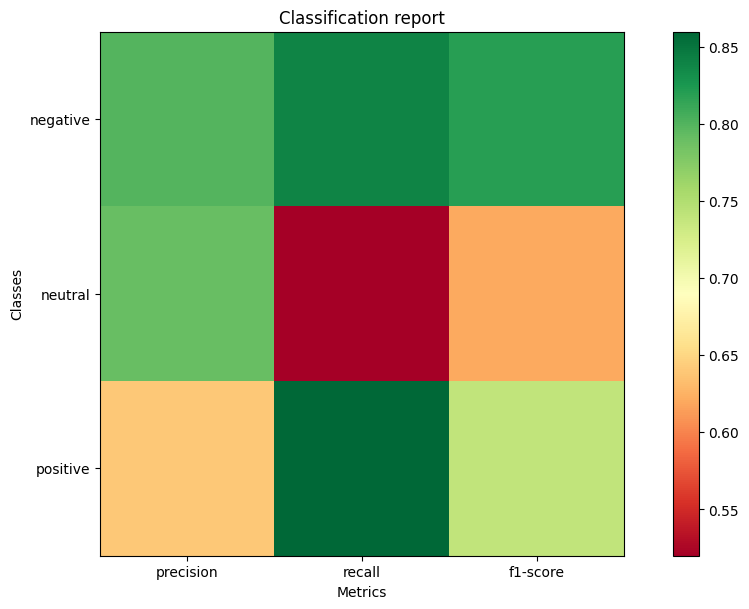

In [9]:
def plot_classification_report(report, title='Classification report', cmap='RdYlGn'):
    lines = report.split('\n')
    classes = []
    plot_mat = []
    for line in lines[2: (len(lines) - 4)]:
        t = line.split()
        if len(t) > 0 and t[0] not in ('avg', 'accuracy', 'macro', 'weighted'):
            classes.append(t[0])
            v = [float(x) for x in t[1:-1]]
            plot_mat.append(v)
    plt.imshow(plot_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = ['precision', 'recall', 'f1-score']
    y_tick_marks = classes
    plt.xticks(range(len(x_tick_marks)), x_tick_marks)
    plt.yticks(range(len(classes)), classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Metrics')

plt.figure(figsize=(10, 6))
plot_classification_report(report)
plt.show()